# Building a Classifier from Lending Club Data
**An end-to-end machine learning example using Pandas and Scikit-Learn **
- For the imbalanced data : OverSampling
- Add new computed features to improve score : 
    - Create another feature by dividing the total amount of the loan by their annual income.
    - Calculate the total cost of the loan from the funded amount, term, and interest rate.



## Data Ingestion



In [1]:
%matplotlib inline
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [2]:
names = [
#Lending Club features
    "funded_amnt",
    "term",
    "int_rate",
    "installment",
    "emp_length",
    "home_ownership",
    "annual_inc",
    "verification_status",
    "purpose",
    "dti",
    "delinq_2yrs",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "revol_bal",
    "revol_util",
# Computed new indexes (features)
    "rFunAmt_AI",
    "rTotPay_AI",
    "rRevBal_AI",
    "rAPay_AI",
# Macroeconomical data
    "pdi",
    "pdi_LSFT",
    "gdp",
    "gdp_LSFT",
    "3yr_rate",
    "3yr_LSFT",
    "cc_rate",
    "unemp",
    "unemp_LSFT",
    "spread",
# Label
    "loan_status"
]

Fnames = names[:-1]

label = names[-1]

# Compute the new DTI that include this credit (or loan request)
data_with_all_csv_features = pd.read_csv("./data/df_cat.csv")
full_data = data_with_all_csv_features[names];
full_data['dti'] = ((full_data.dti*full_data.annual_inc/100) + full_data.installment * 12)/ full_data.annual_inc

#Copy the dataframe to a new DF object.
data = full_data.copy()[names]
data.head(3)

C:\Users\ArchangeGiscard\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,pdi_LSFT,gdp,gdp_LSFT,3yr_rate,3yr_LSFT,cc_rate,unemp,unemp_LSFT,spread,loan_status
0,22000,36,17.27,787.32,15.0,RENT,49000.0,Verified,debt_consolidation,0.490613,...,81.672500,56989.90300,61.285997,0.0039,-0.000048,0.119133,0.083,-0.001456,1.808,Paid
1,4750,36,19.05,174.24,4.0,RENT,42000.0,Not Verified,other,0.241183,...,38.340417,66998.43403,297.043181,0.0039,-0.000048,0.119133,0.091,-0.000742,1.808,Paid
2,2000,36,19.72,74.05,15.0,OWN,45000.0,Not Verified,other,0.056947,...,68.987500,45040.88048,-14.385545,0.0039,-0.000048,0.119133,0.053,-0.000907,1.808,Paid


# Data Exploration

The very first thing to do is to explore the dataset and see what's inside. 

In [3]:
data.describe()
# Shape of the full dataset
print data.shape

(84795, 31)


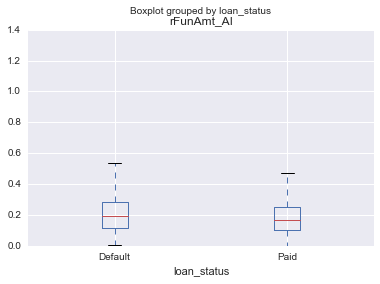

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="rFunAmt_AI",by="loan_status")

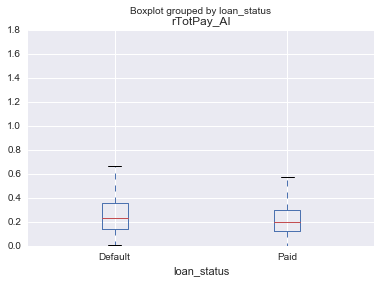

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="rTotPay_AI",by="loan_status")

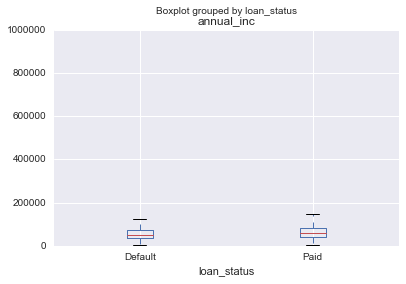

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="annual_inc",by="loan_status")

In [7]:
from pandas.tools.plotting import radviz
import matplotlib.pyplot as plt

fig = plt.figure()
radviz(data, 'loan_status')

plt.show()

TypeError: ("unsupported operand type(s) for -: 'str' and 'str'", u'occurred at index home_ownership')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000181FD8D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017E4FDD8>]], dtype=object)

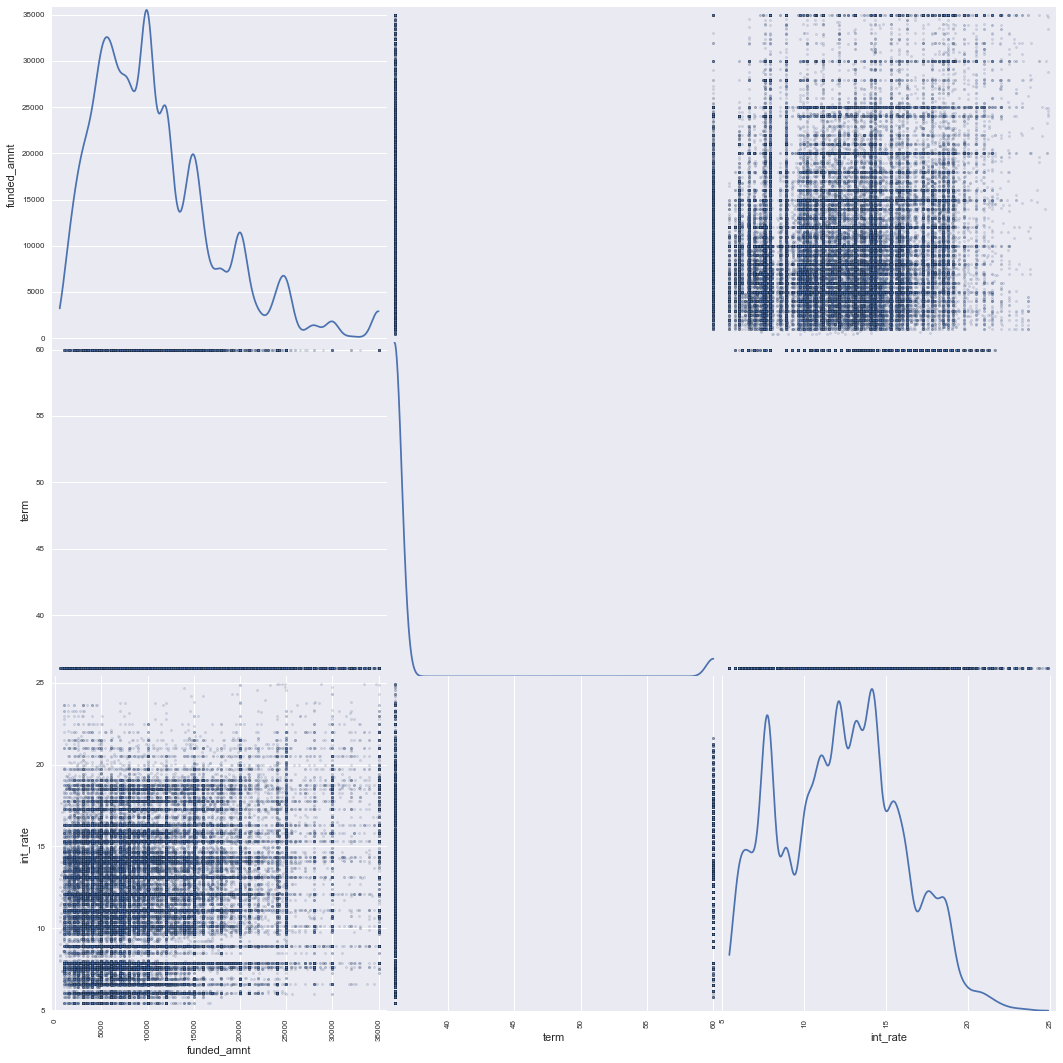

In [8]:
areas = full_data[['funded_amnt','term','int_rate', 'loan_status']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

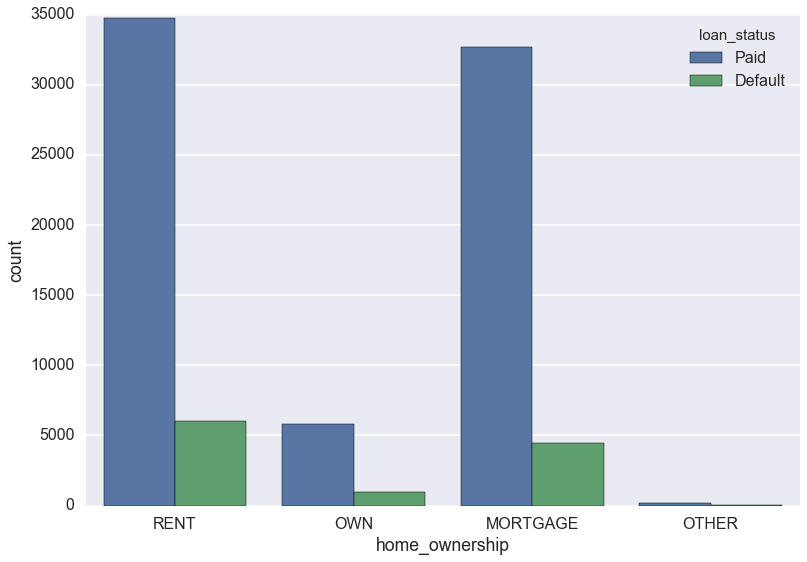

In [9]:
sns.set_context("poster")
sns.countplot(x='home_ownership', hue='loan_status', data=full_data,)

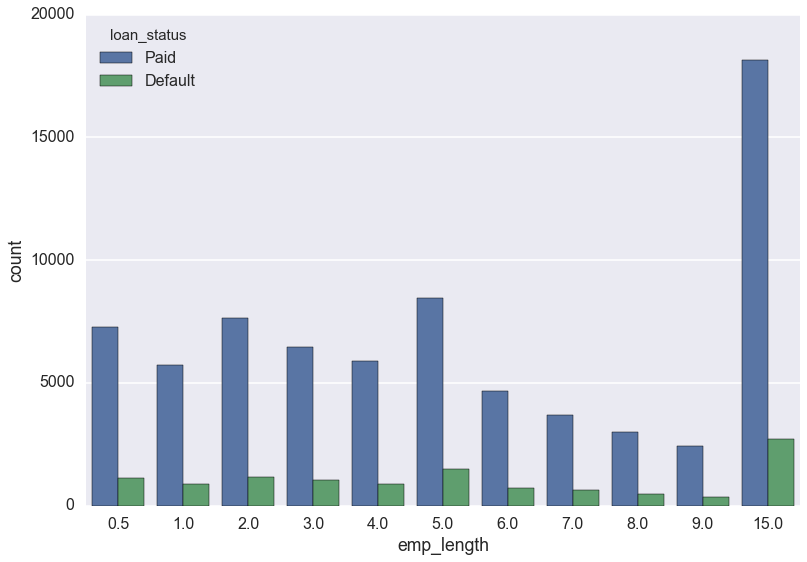

In [10]:
sns.set_context("poster")
sns.countplot(x='emp_length', hue='loan_status', data=full_data,)

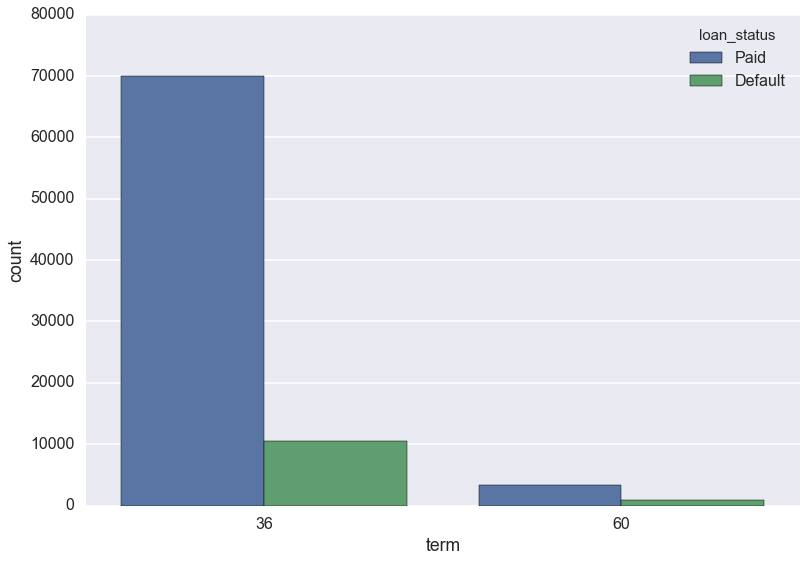

In [11]:
sns.set_context("poster")
sns.countplot(x='term', hue='loan_status', data=full_data,)

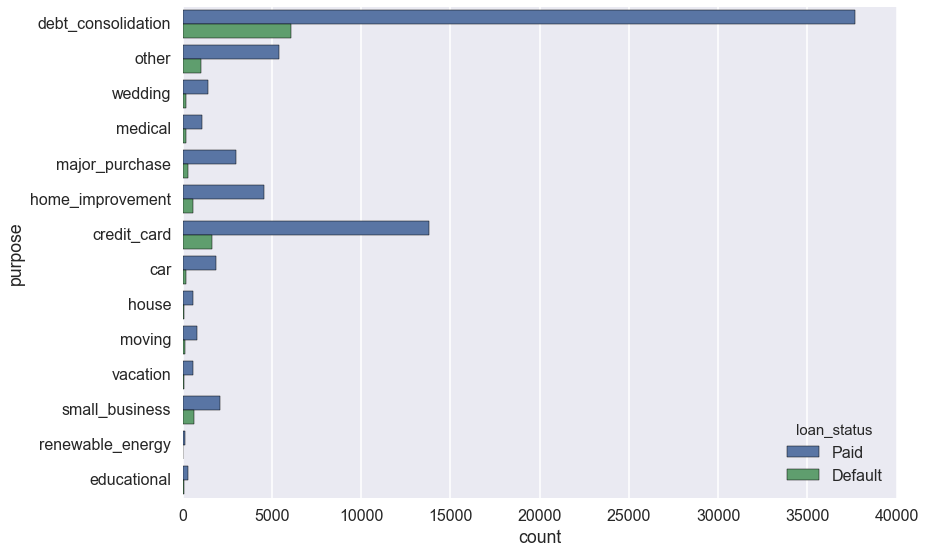

In [12]:
sns.set_context("poster")
sns.countplot(y='purpose', hue='loan_status', data=full_data,)

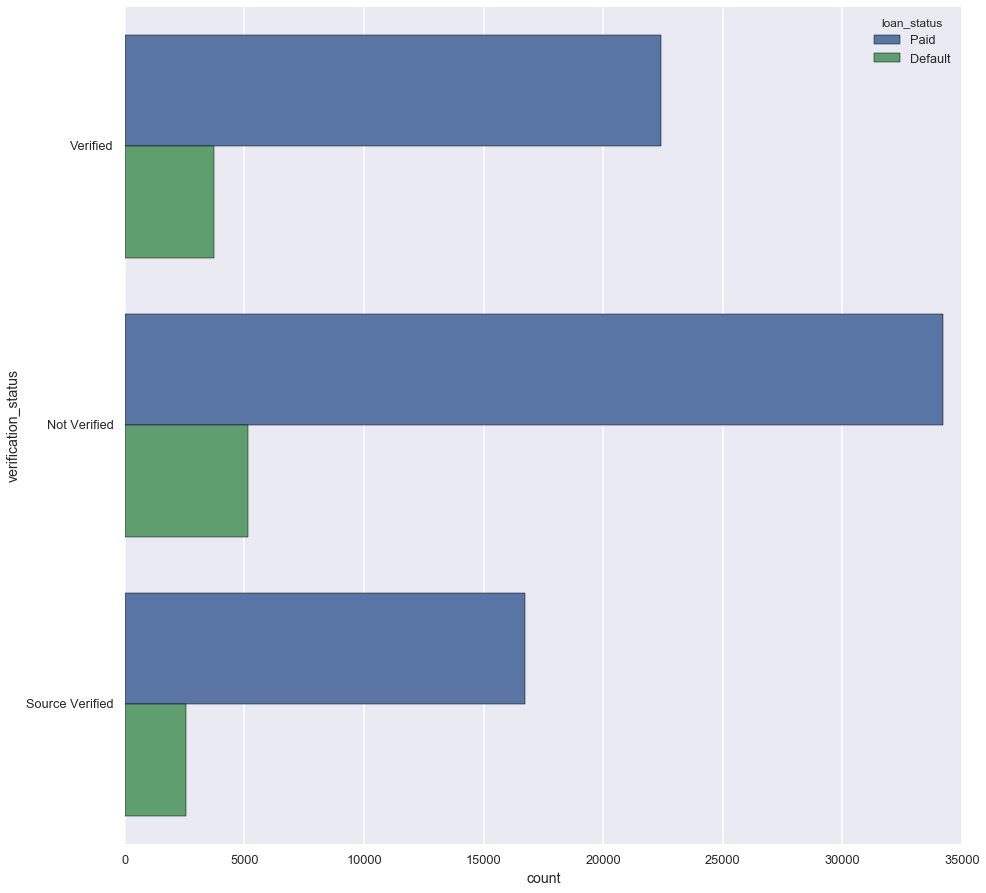

In [13]:
sns.set_context("poster", font_scale=0.8)                                                  
plt.figure(figsize=(15, 15))                                                                                                                                                                                                                                 
plt.ylabel('Loan Originating State')
sns.countplot(y='verification_status', hue='loan_status', data=full_data)

In [14]:
def percConvert(ser):
    return ser/float(ser[-1])

pd.crosstab(data["term"],data["loan_status"],margins=True).apply(percConvert, axis=1)

loan_status,Default,Paid,All
term,,,
36,0.130253,0.869747,1.0
60,0.222690,0.777310,1.0
All,0.134914,0.865086,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A6FA668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001B0C3198>], dtype=object)

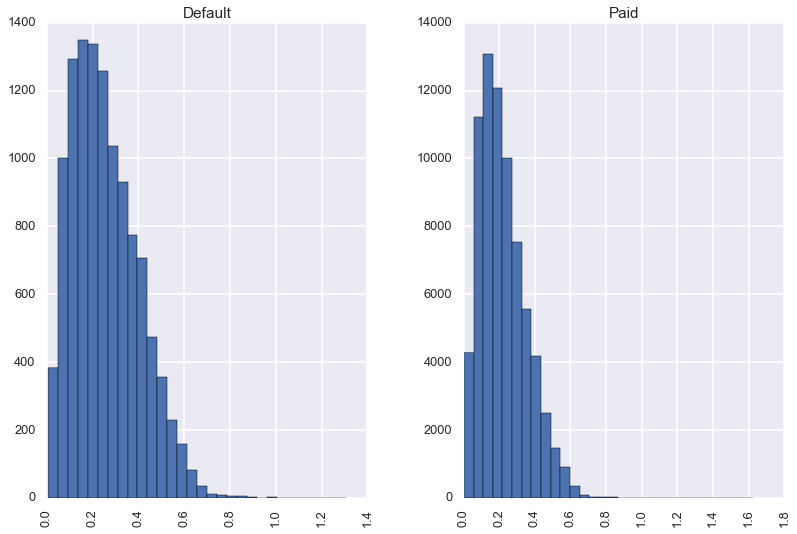

In [15]:
data.hist(column="rTotPay_AI",by="loan_status",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BF346A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001AFEC400>], dtype=object)

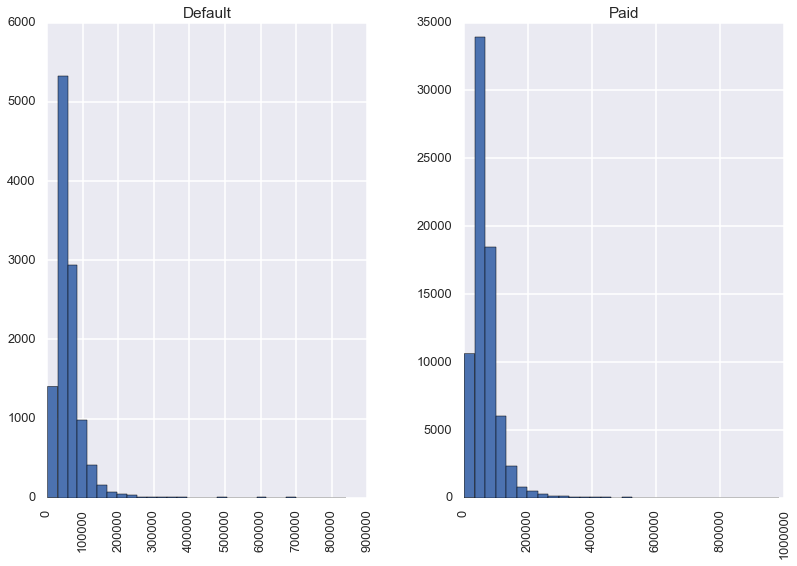

In [16]:
data.hist(column="annual_inc",by="loan_status",bins=30)

In [17]:
#Before oversampling, keep some 10% for final validation with unseen data.

from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
data = data.sample(data.shape[0])
data = data.sample(data.shape[0])
data = data.sample(data.shape[0])

X = data[Fnames]
y = data[label]

unseen_paid = data.loc[(data['loan_status'] == "Paid")]
unseen_default = data.loc[(data['loan_status'] == "Default")]

X_traintest, X_finaltest, y_traintest, y_finaltest = cross_validation.train_test_split(unseen_paid[Fnames],unseen_paid[label],test_size = 0.01,random_state=14)
data_for_final_validation_1 = pd.concat([X_finaltest, y_finaltest], axis=1)
traintest_data1 = pd.concat([X_traintest, y_traintest], axis=1)

X_traintest, X_finaltest, y_traintest, y_finaltest = cross_validation.train_test_split(unseen_default[Fnames],unseen_default[label],test_size = 0.01,random_state=14)
data_for_final_validation_0 = pd.concat([X_finaltest, y_finaltest], axis=1)
traintest_data0 = pd.concat([X_traintest, y_traintest], axis=1)

data_for_final_validation = data_for_final_validation_0.append(data_for_final_validation_1,ignore_index = True )
traintest_data = traintest_data0.append(traintest_data1,ignore_index = True )

# Balancing the data so that we have 50/50 class balancing (underbalancing reducing one class)
paid_data = traintest_data.loc[(traintest_data['loan_status'] == "Paid")]
default_data = traintest_data.loc[(traintest_data['loan_status'] == "Default")]

orig_default_data = default_data


default_data2 = default_data.append(default_data,ignore_index = True )
default_data3 = default_data2.append(default_data2,ignore_index = True )
default_data4 = default_data3.append(default_data2,ignore_index = True )
print "Default data 4 size was {}".format(default_data4.shape[0])
print "Fully Paid data size was {}".format(paid_data.shape[0])

# Reduce the Fully Paid data to the same number as Defaulted
#num_of_paid = default_data.shape[0]
#reduce_paid_data = paid_data.sample(num_of_paid)

# This is the smaller sample data with 50-50 Defaulted and Fully aod loan
#balanced_data = reduce_paid_data.append(default_data,ignore_index = True )


#Now shuffle several times
#data = balanced_data.sample(balanced_data.shape[0])
sizeofdata = default_data4.shape[0] + paid_data.shape[0]
print "data size is {}".format(sizeofdata)
data = paid_data.append(default_data4,ignore_index = True )
data = data.sample(sizeofdata)
data = data.sample(sizeofdata)


Default data 4 size was 67950
Fully Paid data size was 72621
data size is 140571


In [18]:
pd.crosstab(data["term"],data["loan_status"],margins=True).apply(percConvert, axis=1)

loan_status,Default,Paid,All
term,,,
36,0.473233,0.526767,1.0
60,0.632637,0.367363,1.0
All,0.483386,0.516614,1.0


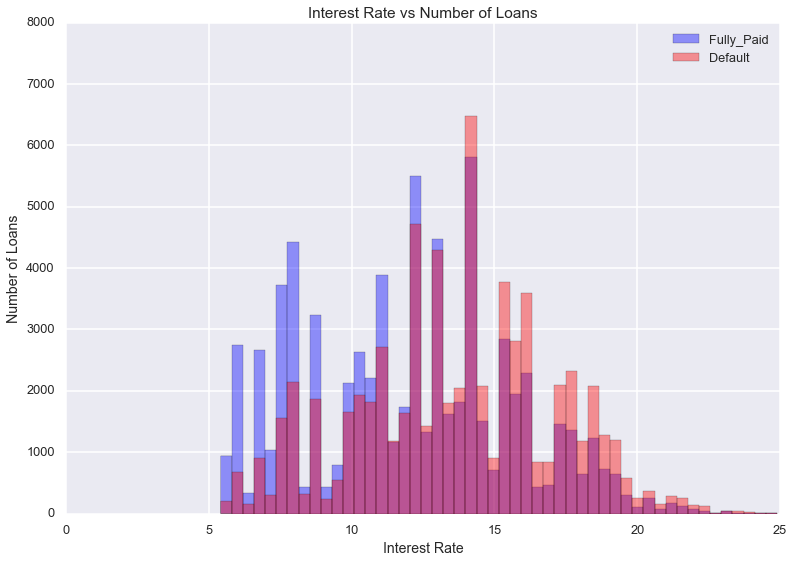

In [19]:
paid_data = data.loc[(data['loan_status'] == "Paid")]
default_data = data.loc[(data['loan_status'] == "Default")]


fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(paid_data['int_rate'], bins = 50, alpha = 0.4, label='Fully_Paid', color = 'blue', range = (paid_data['int_rate'].min(),paid_data['int_rate'].max()))
ax.hist(default_data['int_rate'], bins = 50, alpha = 0.4, label='Default', color = 'red', range = (default_data['int_rate'].min(),default_data['int_rate'].max()))
plt.title('Interest Rate vs Number of Loans')
plt.legend(loc='upper right')
plt.xlabel('Interest Rate')
plt.axis([0, 25, 0, 8000])
plt.ylabel('Number of Loans')
plt.show()


The countplot function accepts either an x or a y argument to specify if this is a bar plot or a column plot. I chose to use the y argument so that the labels were readable. The hue argument specifies a column for comparison; in this case we're concerned with the relationship of our categorical variables to the target income.


## Data Management 

In order to organize our data on disk, we'll need to add the following files:

- `README.md`: a markdown file containing information about the dataset and attribution. Will be exposed by the `DESCR` attribute.
- `meta.json`: a helper file that contains machine readable information about the dataset like `target_names` and `feature_names`.

In [20]:
import json 

meta = {
    'target_names': list(full_data.loan_status.unique()),
    'feature_names': list(full_data.columns),
    'categorical_features': {
        column: list(full_data[column].unique())
        for column in full_data.columns
        if full_data[column].dtype == 'object'
    },
}

with open('data/ls_meta.json', 'wb') as f:
    json.dump(meta, f, indent=2)

This code creates a `meta.json` file by inspecting the data frame that we have constructued. The `target_names` column, is just the two unique values in the `data.loan_status` series; by using the `pd.Series.unique` method - we're guarenteed to spot data errors if there are more or less than two values. The `feature_names` is simply the names of all the columns. 

Then we get tricky &mdash; we want to store the possible values of each categorical field for lookup later, but how do we know which columns are categorical and which are not? Luckily, Pandas has already done an analysis for us, and has stored the column data type, `data[column].dtype`, as either `int64` or `object`. Here I am using a dictionary comprehension to create a dictionary whose keys are the categorical columns, determined by checking the object type and comparing with `object`, and whose values are a list of unique values for that field. 

Now that we have everything we need stored on disk, we can create a `load_data` function, which will allow us to load the training and test datasets appropriately from disk and store them in a `Bunch`: 

In [21]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.datasets.base import Bunch

def load_data(root='data'):
    # Load the meta data from the file 
    with open(os.path.join(root, 'ls_meta.json'), 'r') as f:
        meta = json.load(f) 
    
    names = meta['feature_names']
    
    # Load the readme information 
    with open(os.path.join(root, 'README.md'), 'r') as f:
        readme = f.read()    
    
    X = data[Fnames]
    
    # Remove the target from the categorical features 
    meta['categorical_features'].pop(label)
    
    y = data[label]
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2,random_state=10)

    
    # Return the bunch with the appropriate data chunked apart
    return Bunch(
        #data = train[names[:-1]],
        data = X_train,
        #target = train[names[-1]], 
        target = y_train, 
        #data_test = test[names[:-1]], 
        data_test = X_test, 
        #target_test = test[names[-1]], 
        target_test = y_test, 
        target_names = meta['target_names'],
        feature_names = meta['feature_names'], 
        categorical_features = meta['categorical_features'], 
        DESCR = readme,
    )

dataset = load_data()
print meta['target_names']

['Paid', 'Default']


The primary work of the `load_data` function is to locate the appropriate files on disk, given a root directory that's passed in as an argument (if you saved your data in a different directory, you can modify the root to have it look in the right place). The meta data is included with the bunch, and is also used split the train and test datasets into `data` and `target` variables appropriately, such that we can pass them correctly to the Scikit-Learn `fit` and `predict` estimator methods. 

## Feature Extraction 

Now that our data management workflow is structured a bit more like Scikit-Learn, we can start to use our data to fit models. Unfortunately, the categorical values themselves are not useful for machine learning; we need a single instance table that contains _numeric values_. In order to extract this from the dataset, we'll have to use Scikit-Learn transformers to transform our input dataset into something that can be fit to a model. In particular, we'll have to do the following:

- encode the categorical labels as numeric data 
- impute missing values with data (or remove)

We will explore how to apply these transformations to our dataset, then we will create a feature extraction pipeline that we can use to build a model from the raw input data. This pipeline will apply both the imputer and the label encoders directly in front of our classifier, so that we can ensure that features are extracted appropriately in both the training and test datasets.  

### Label Encoding 

Our first step is to get our data out of the object data type land and into a numeric type, since nearly all operations we'd like to apply to our data are going to rely on numeric types. Luckily, Sckit-Learn does provide a transformer for converting categorical labels into numeric integers: [`sklearn.preprocessing.LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Unfortunately it can only transform a single vector at a time, so we'll have to adapt it in order to apply it to multiple columns. 

Like all Scikit-Learn transformers, the `LabelEncoder` has `fit` and `transform` methods (as well as a special all-in-one, `fit_transform` method) that can be used for stateful transformation of a dataset. In the case of the `LabelEncoder`, the `fit` method discovers all unique elements in the given vector, orders them lexicographically, and assigns them an integer value. These values are actually the indices of the elements inside the `LabelEncoder.classes_` attribute, which can also be used to do a reverse lookup of the class name from the integer value. 

For example, if we were to encode the `home_ownership` column of our dataset as follows:

Obviously this is very useful for a single column, and in fact the `LabelEncoder` really was intended to encode the target variable, not necessarily categorical data expected by the classifiers.

In order to create a multicolumn LabelEncoder, we'll have to extend the `TransformerMixin` in Scikit-Learn to create a transformer class of our own, then provide `fit` and `transform` methods that wrap individual `LabelEncoders` for our columns. 

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder 


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None. 
    """
    
    def __init__(self, columns=None):
        self.columns  = columns 
        self.encoders = None
    
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode. 
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns 
        
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns 
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame. 
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        
        return output

encoder = EncodeCategorical(dataset.categorical_features.keys())

#data = encoder.fit_transform(dataset.data)
#data = encoder.fit_transform(data)
#print data.head(3)

This specialized transformer now has the ability to label encode multiple columns in a data frame, saving information about the state of the encoders. It would be trivial to add an `inverse_transform` method that accepts numeric data and converts it to labels, using the `inverse_transform` method of each individual `LabelEncoder` on a per-column basis. 

### Imputation 

Scikit-Learn provides a transformer for dealing with missing values at either the column level or at the row level in the `sklearn.preprocessing` library called the [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html).

The `Imputer` requires information about what missing values are, either an integer or the string, `Nan` for `np.nan` data types, it then requires a strategy for dealing with it. For example, the `Imputer` can fill in the missing values with the mean, median, or most frequent values for each column. If provided an axis argument of 0 then columns that contain only missing data are discarded; if provided an axis argument of 1, then rows which contain only missing values raise an exception. Basic usage of the `Imputer` is as follows:

```python
imputer = Imputer(missing_values='Nan', strategy='most_frequent')
imputer.fit(dataset.data)
```

In [24]:
from sklearn.preprocessing import Imputer 

class ImputeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None. 
    """
    
    def __init__(self, columns=None):
        self.columns = columns 
        self.imputer = None
    
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to impute. 
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns 
        
        # Fit an imputer for each column in the data frame
        #self.imputer = Imputer(strategy='most_frequent')
        self.imputer = Imputer(strategy='mean')
        self.imputer.fit(data[self.columns])

        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame. 
        """
        output = data.copy()
        output[self.columns] = self.imputer.transform(output[self.columns])
        
        return output

imputer = ImputeCategorical(Fnames)
    
#data = imputer.fit_transform(data)

In [25]:
data.head(5)

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,pdi_LSFT,gdp,gdp_LSFT,3yr_rate,3yr_LSFT,cc_rate,unemp,unemp_LSFT,spread,loan_status
119541,7125,36,18.49,259.35,8.0,MORTGAGE,67641.0,Source Verified,debt_consolidation,0.157811,...,76.707756,66743.70307,112.902390,0.0035,-0.000053,0.118967,0.076,-0.000302,1.6225,Default
123482,10000,36,11.71,330.76,5.0,RENT,32000.0,Not Verified,credit_card,0.342335,...,80.340769,38888.02980,27.251371,0.0039,-0.000792,0.123533,0.090,-0.001148,1.9595,Default
76753,10000,36,8.94,317.72,0.5,RENT,30000.0,Not Verified,debt_consolidation,0.183088,...,-92.490504,47132.98790,-364.465297,0.0148,-0.000186,0.136733,0.083,0.003280,3.2185,Default
128909,8975,36,15.31,312.49,15.0,RENT,89000.0,Verified,small_business,0.154233,...,43.576667,39661.91173,102.672159,0.0033,-0.000098,0.119867,0.092,-0.001489,1.4605,Default
93793,6000,36,16.29,211.81,2.0,MORTGAGE,60500.0,Not Verified,debt_consolidation,0.164412,...,129.465000,54447.02087,83.492739,0.0033,-0.000098,0.119867,0.064,-0.000473,1.4605,Default


Our custom imputer, like the `EncodeCategorical` transformer takes a set of columns to perform imputation on. In this case we only wrap a single `Imputer` as the `Imputer` is multicolumn &mdash; all that's required is to ensure that the correct columns are transformed. 

I had chosen to do the label encoding first, assuming that because the `Imputer` required numeric values, I'd be able to do the parsing in advance. However, after requiring a custom imputer, I'd say that it's probably best to deal with the missing values early, when they're still a specific value, rather than take a chance. 

## Model Build 

To create classifier, we're going to create a [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that uses our feature transformers and ends in an estimator that can do classification. We can then write the entire pipeline object to disk with the `pickle`, allowing us to load it up and use it to make predictions in the future. 

A pipeline is a step-by-step set of transformers that takes input data and transforms it, until finally passing it to an estimator at the end. Pipelines can be constructed using a named declarative syntax so that they're easy to modify and develop. 

# Parallel Coordintes Graph

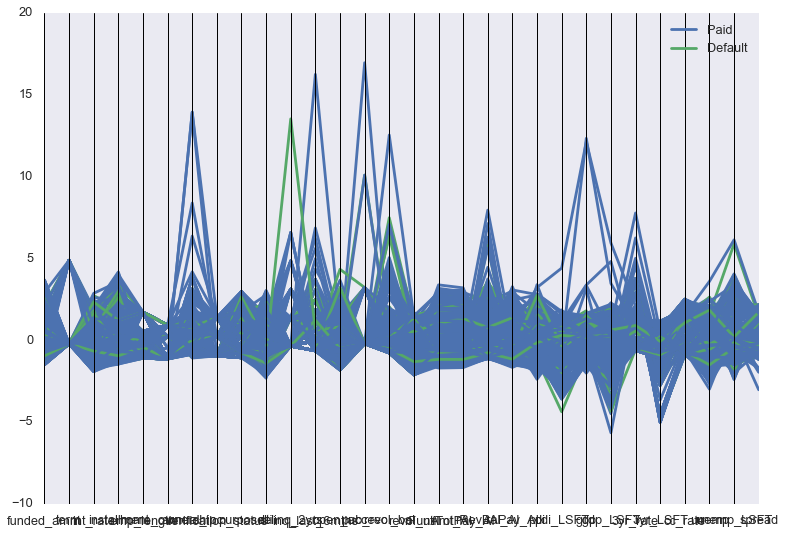

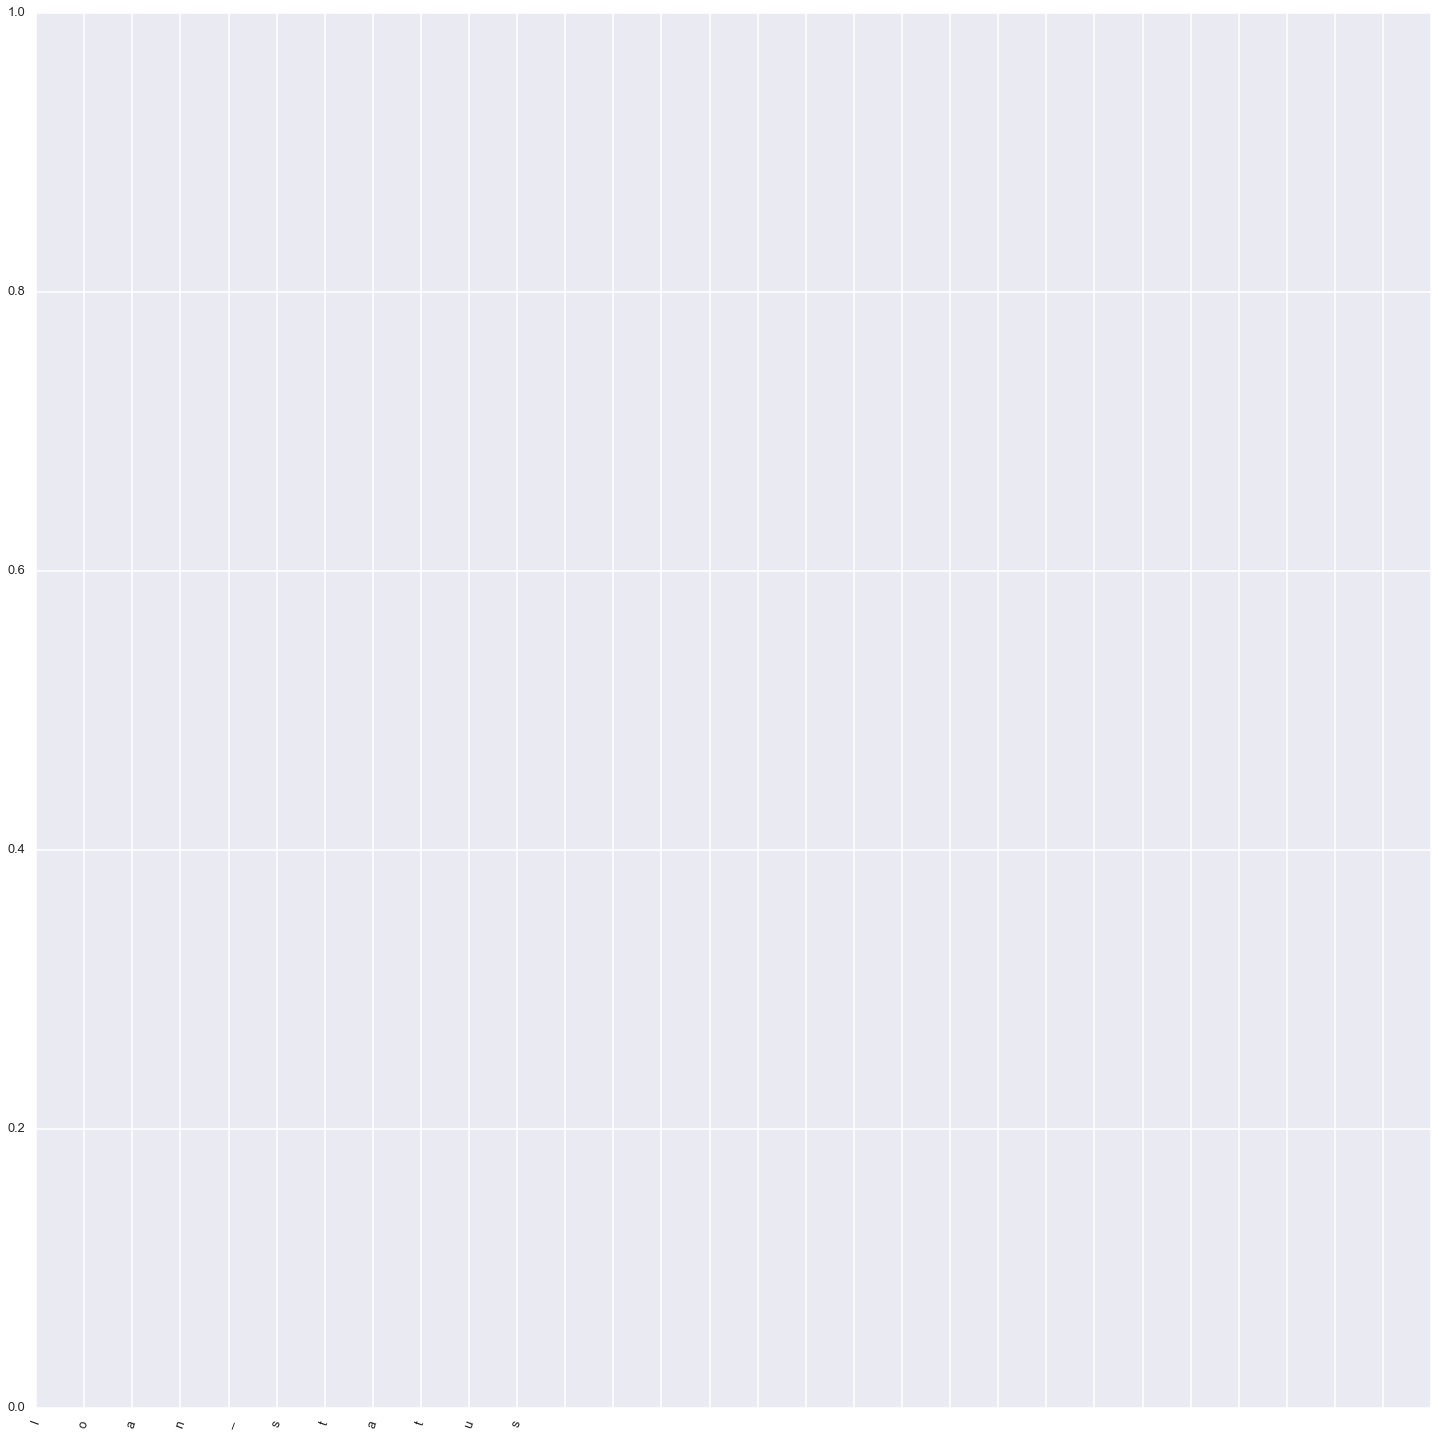

In [31]:
from pandas.tools.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
import numpy as np

def pcoord_viz(df, labels):
    fig = parallel_coordinates(df, labels, color=sns.color_palette())
    xnum = np.linspace(0,30,30)
    plt.figure(figsize=(25, 25)) 
    plt.xticks(xnum, labels, rotation=70)
    plt.show()

#yencode = LabelEncoder().fit(dataset.target)
#data[label] = yencode.transform(data[label])
stdscale = StandardScaler()
datadf = encoder.fit_transform(full_data[names].sample(1000))
datadf[Fnames] = stdscale.fit_transform(datadf[Fnames])
#standarddata = StandardScaler(data)
pcoord_viz(datadf,'loan_status') # Specify which column contains the labels

# PCA

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

# we need to encode our target data as well. 

yencode = LabelEncoder().fit(dataset.target)

# construct the pipeline 
pca = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)), 
        ('scalar', StandardScaler()),        
        #('classifier', PCA(n_components=20))
        ('classifier', PCA())
    ])

# fit the pipeline 
pca.fit(dataset.data, yencode.transform(dataset.target))

Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'home_ownership', u'purpose', u'verification_status'])), ('imputer', ImputeCategorical(columns=['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_...e, with_mean=True, with_std=True)), ('classifier', PCA(copy=True, n_components=None, whiten=False))])

[  1.70837623e-01   1.18969063e-01   8.23666725e-02   6.38900909e-02
   5.70267085e-02   5.15002811e-02   4.73824562e-02   4.18963191e-02
   3.60466213e-02   3.46009028e-02   3.27225947e-02   3.13956450e-02
   2.91716578e-02   2.79704109e-02   2.51841952e-02   2.42334795e-02
   2.23212770e-02   2.08667402e-02   1.38031342e-02   1.26280829e-02
   1.06332230e-02   1.05539703e-02   9.59503069e-03   7.93172790e-03
   6.67741261e-03   5.81566625e-03   3.56018343e-03   2.67876730e-04
   1.01837124e-04   4.91159912e-05]
[  17.08   28.98   37.22   43.61   49.31   54.46   59.2    63.39   66.99
   70.45   73.72   76.86   79.78   82.58   85.1    87.52   89.75   91.84
   93.22   94.48   95.54   96.6    97.56   98.35   99.02   99.6    99.96
   99.99  100.    100.  ]


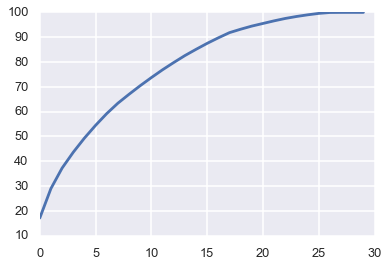

In [33]:
import numpy as np

#The amount of variance that each PC explains
var= pca.named_steps['classifier'].explained_variance_ratio_
print var

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.named_steps['classifier'].explained_variance_ratio_, decimals=4)*100)

print var1
plt.plot(var1)

explained variance ratio (first two components): [ 0.17220687  0.1188023 ]


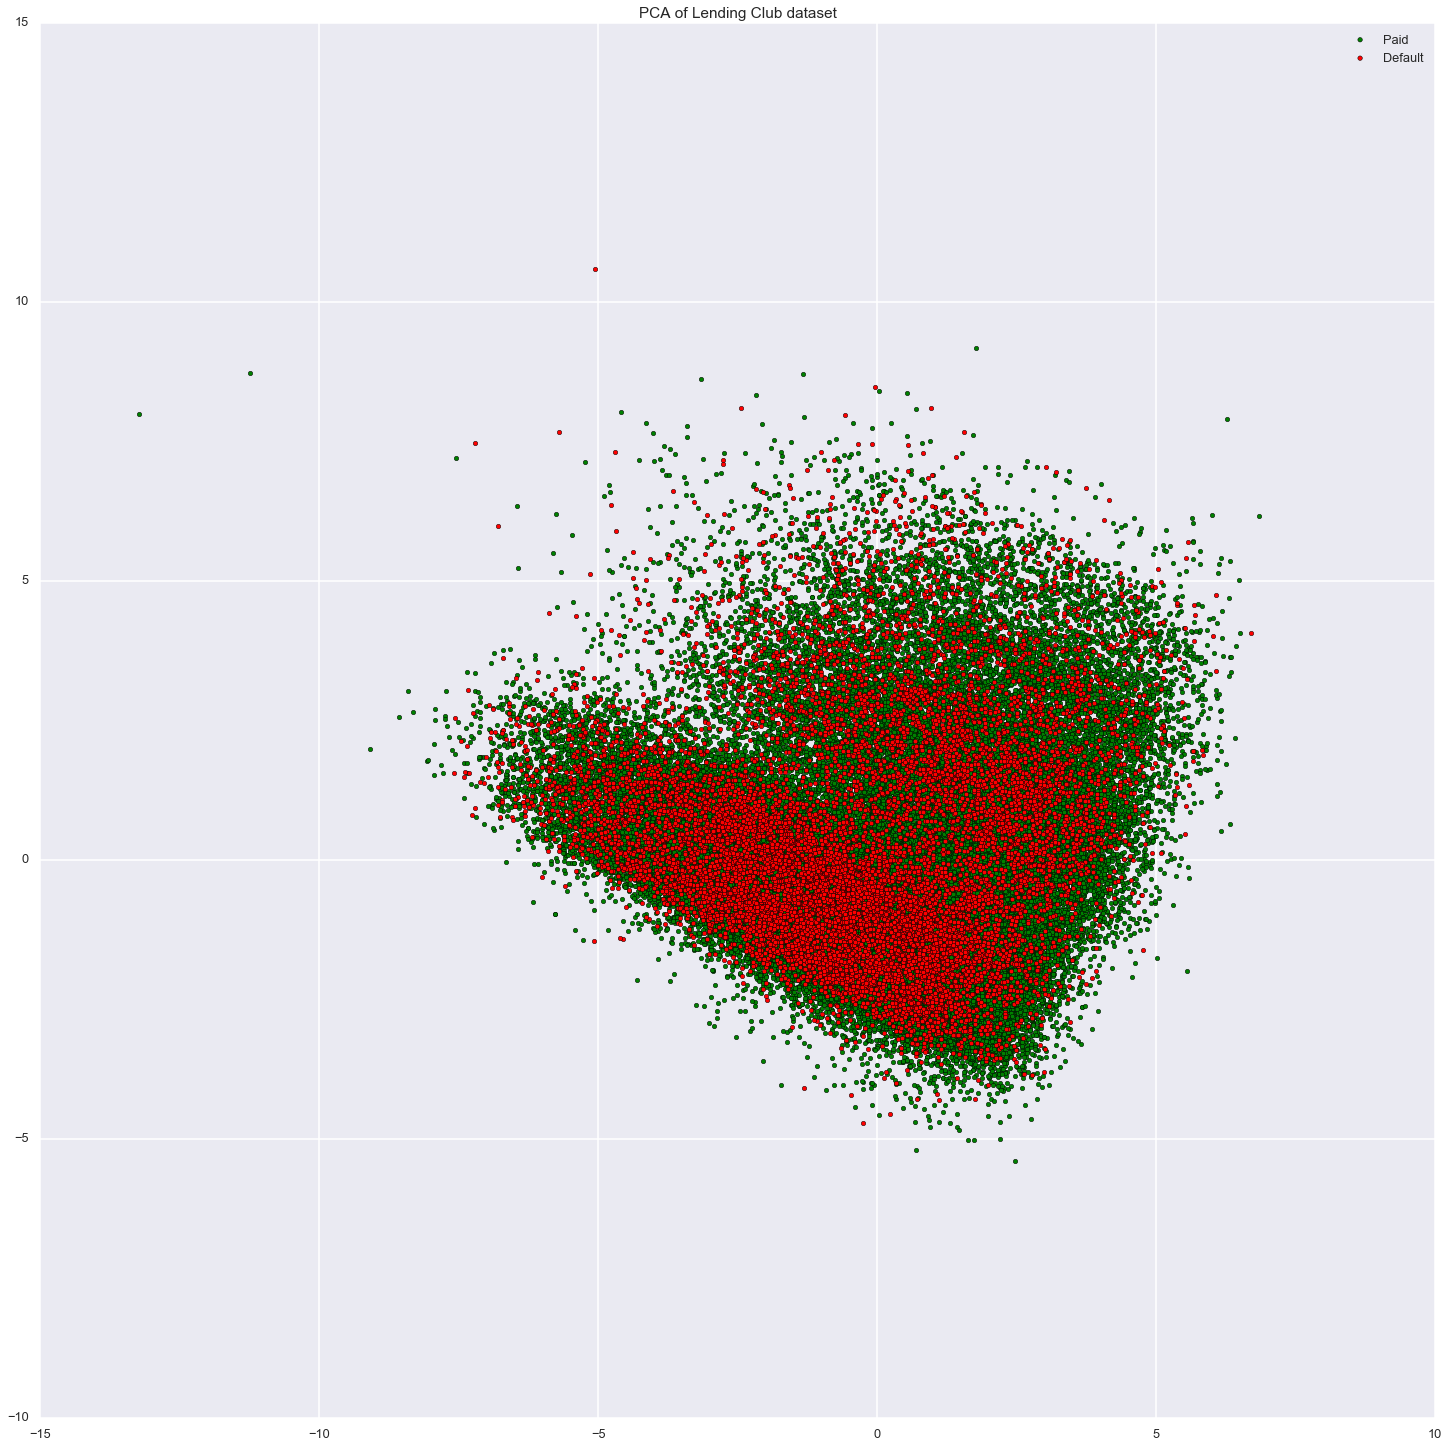

In [58]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

stdscale = StandardScaler()
datadf = encoder.fit_transform(full_data[names])
datadf[Fnames] = stdscale.fit_transform(datadf[Fnames])

X = datadf[Fnames]
y = yencode.transform(datadf[label])

target_names = ['Paid','Default']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(25, 25))
for c, i, target_name in zip("gr", [1, 0], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of Lending Club dataset')

#plt.figure()
#for c, i, target_name in zip("gr", [0, 1], target_names):
#    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
#plt.legend()
#plt.title('LDA of Lending Club dataset')

plt.show()

explained variance ratio (first two components): [ 0.17083762  0.11896906]


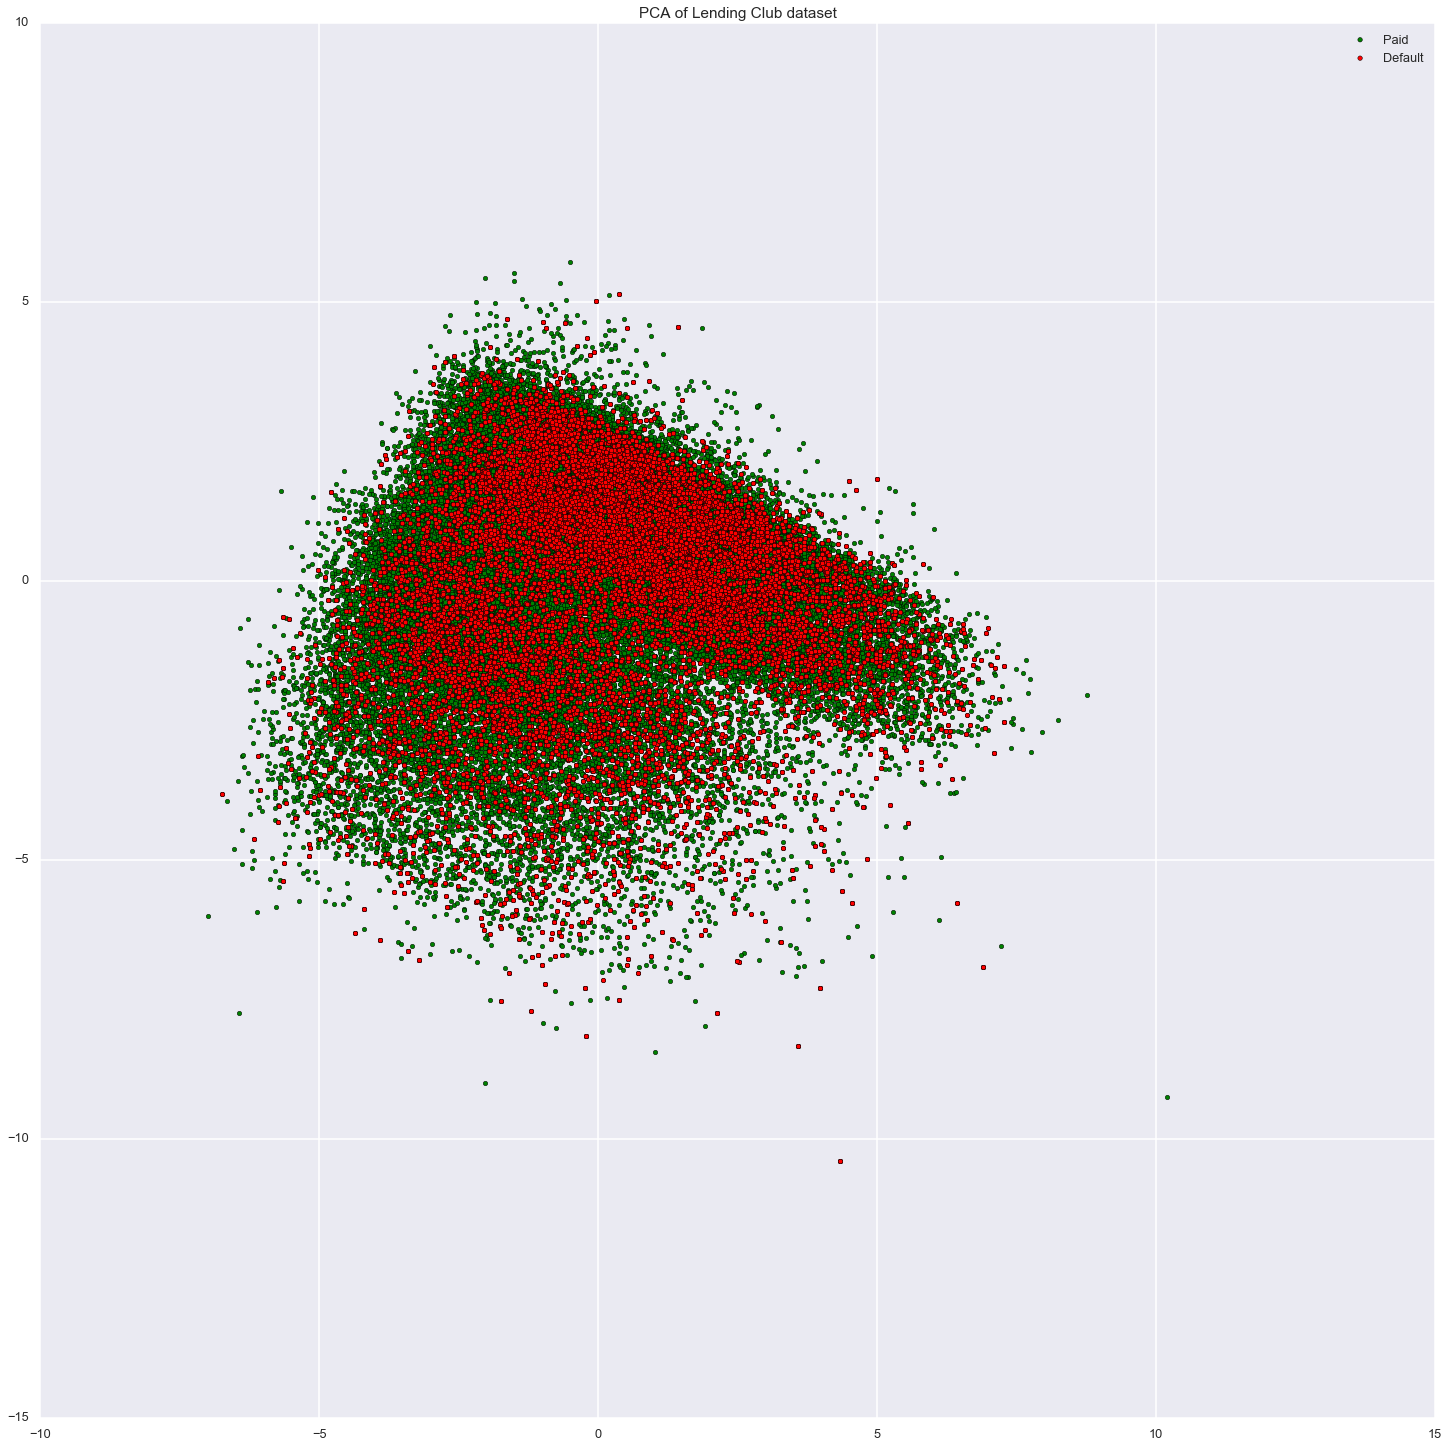

In [60]:
#PCA for the training dataset

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

stdscale = StandardScaler()
datadf = encoder.fit_transform(dataset.data[Fnames])
datadf[Fnames] = stdscale.fit_transform(datadf[Fnames])

X = datadf[Fnames]
y = yencode.transform(dataset.target)

target_names = ['Paid','Default']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(25, 25))
for c, i, target_name in zip("gr", [1, 0], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of Lending Club dataset')

#plt.figure()
#for c, i, target_name in zip("gr", [0, 1], target_names):
#    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
#plt.legend()
#plt.title('LDA of Lending Club dataset')

plt.show()

# LDA

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.lda import LDA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

# we need to encode our target data as well. 

yencode = LabelEncoder().fit(dataset.target)

# construct the pipeline 
lda = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)), 
        ('scalar', StandardScaler()),        
        ('classifier', LDA())

    ])

# fit the pipeline 
lda.fit(dataset.data, yencode.transform(dataset.target))

C:\Users\ArchangeGiscard\Anaconda2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'home_ownership', u'purpose', u'verification_status'])), ('imputer', ImputeCategorical(columns=['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_...None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
[  17.08   28.98   37.22   43.61   49.31   54.46   59.2    63.39   66.99
   70.45   73.72   76.86   79.78   82.58   85.1    87.52   89.75   91.84
   93.22   94.48   95.54   96.6    97.56   98.35   99.02   99.6    99.96
   99.99  100.    100.  ]


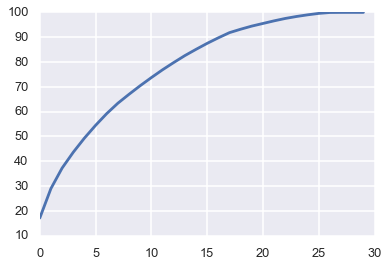

In [62]:
import numpy as np

#The amount of variance that each PC explains
var= lda.named_steps['classifier']
print var

#Cumulative Variance explains
#var1=np.cumsum(np.round(lda.named_steps['classifier'], decimals=4)*100)

print var1
plt.plot(var1)

# Logistic Regression

Fits a logistic model to data and makes predictions about the probability of a categorical event (between 0 and 1). Logistic regressions make predictions between 0 and 1, so in order to classify multiple classes a one-vs-all scheme is used (one model per class, winner-takes-all).

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# we need to encode our target data as well. 
yencode = LabelEncoder().fit(dataset.target)

#normalizer = Normalizer(copy=False)

# construct the pipeline 
lr = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)), 
        ('scalar', StandardScaler()),
        ('classifier', LogisticRegression(penalty='l2',class_weight={0:.7, 1:.3}))
    ])

# fit the pipeline 
lr.fit(dataset.data, yencode.transform(dataset.target))

Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'home_ownership', u'purpose', u'verification_status'])), ('imputer', ImputeCategorical(columns=['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [64]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs[0], names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

coefs = lr.named_steps['classifier'].coef_
print "Linear model:", pretty_print_linear(coefs, Fnames)

Linear model: 0.498 * funded_amnt + -0.173 * term + -0.41 * int_rate + -0.294 * installment + -0.019 * emp_length + -0.033 * home_ownership + 0.032 * annual_inc + 0.008 * verification_status + -0.163 * purpose + -0.068 * dti + -0.011 * delinq_2yrs + -0.207 * inq_last_6mths + -0.006 * open_acc + -0.06 * pub_rec + -0.006 * revol_bal + -0.078 * revol_util + -0.683 * rFunAmt_AI + 0.268 * rTotPay_AI + -0.036 * rRevBal_AI + 0.164 * rAPay_AI + -0.062 * pdi + 0.015 * pdi_LSFT + 0.084 * gdp + -0.012 * gdp_LSFT + -0.116 * 3yr_rate + 0.065 * 3yr_LSFT + 0.103 * cc_rate + -0.108 * unemp + -0.033 * unemp_LSFT + 0.088 * spread


In [65]:
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import collections


print collections.Counter(dataset.target_test)
print collections.Counter(dataset.target)
print collections.Counter(full_data[label])
print collections.Counter(data_for_final_validation[label])


print "Test under TEST DATASET"

# encode test targets
y_true = yencode.transform(dataset.target_test)
# use the model to get the predicted value
y_pred = lr.predict(dataset.data_test)
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under TRAIN DATASET"
# encode test targets
y_true = yencode.transform(dataset.target)
# use the model to get the predicted value
y_pred = lr.predict(dataset.data)
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under FULL IMBALANCED DATASET without new fit call"

#lr.fit(full_data[Fnames], yencode.transform(full_data[label]))
# encode test targets
y_true = yencode.transform(full_data[label])
# use the model to get the predicted value
y_pred = lr.predict(full_data[Fnames])
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under UNSEEN DATA without new fit call"

# encode test targets
y_true = yencode.transform(data_for_final_validation[label])
# use the model to get the predicted value
y_pred = lr.predict(data_for_final_validation[Fnames])
#print lr.predict_proba(data_for_final_validation[Fnames])
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

Counter({'Paid': 14503, 'Default': 13612})
Counter({'Paid': 58118, 'Default': 54338})
Counter({'Paid': 73355, 'Default': 11440})
Counter({'Paid': 734, 'Default': 115})
Test under TEST DATASET
             precision    recall  f1-score   support

       Paid       0.52      0.94      0.67     13612
    Default       0.78      0.19      0.31     14503

avg / total       0.65      0.56      0.49     28115

Test under TRAIN DATASET
             precision    recall  f1-score   support

       Paid       0.52      0.94      0.67     54338
    Default       0.78      0.20      0.32     58118

avg / total       0.66      0.56      0.49    112456

Test under FULL IMBALANCED DATASET without new fit call
             precision    recall  f1-score   support

       Paid       0.15      0.94      0.27     11440
    Default       0.95      0.20      0.33     73355

avg / total       0.85      0.30      0.32     84795

Test under UNSEEN DATA without new fit call
             precision    recall  f1-s

## Chaining PCA and Logistic Regression
The PCA does an unsupervised dimensionality reduction, while the logistic regression does the prediction.
Here we are using default values for all component of the pipeline.

In [66]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import linear_model, decomposition

yencode = LabelEncoder().fit(dataset.target)
logistic = linear_model.LogisticRegression(penalty='l2',class_weight={0:.65, 1:.35})
pca = decomposition.PCA(n_components=24)

pipelr = Pipeline(steps=[
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)),
        ('scalar', StandardScaler()),
        ('pca', pca),
        ('logistic', logistic)
    ])

# fit the pipeline 
pipelr.fit(dataset.data, yencode.transform(dataset.target))

Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'home_ownership', u'purpose', u'verification_status'])), ('imputer', ImputeCategorical(columns=['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [67]:
# Running the test
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import collections


print collections.Counter(dataset.target_test)
print collections.Counter(dataset.target)
print collections.Counter(full_data[label])
print collections.Counter(data_for_final_validation[label])


print "Test under TEST DATASET"

# encode test targets
y_true = yencode.transform(dataset.target_test)
# use the model to get the predicted value
y_pred = pipelr.predict(dataset.data_test)
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under TRAIN DATASET"
# encode test targets
y_true = yencode.transform(dataset.target)
# use the model to get the predicted value
y_pred = pipelr.predict(dataset.data)
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under FULL IMBALANCED DATASET without new fit call"

#lda.fit(full_data[Fnames], yencode.transform(full_data[label]))
# encode test targets
y_true = yencode.transform(full_data[label])
# use the model to get the predicted value
y_pred = pipelr.predict(full_data[Fnames])
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under UNSEEN DATA without new fit call"

# encode test targets
y_true = yencode.transform(data_for_final_validation[label])
# use the model to get the predicted value
y_pred = pipelr.predict(data_for_final_validation[Fnames])
#print pipelr.predict_proba(data_for_final_validation[Fnames])
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

Counter({'Paid': 14503, 'Default': 13612})
Counter({'Paid': 58118, 'Default': 54338})
Counter({'Paid': 73355, 'Default': 11440})
Counter({'Paid': 734, 'Default': 115})
Test under TEST DATASET
             precision    recall  f1-score   support

       Paid       0.54      0.89      0.67     13612
    Default       0.74      0.30      0.42     14503

avg / total       0.64      0.58      0.54     28115

Test under TRAIN DATASET
             precision    recall  f1-score   support

       Paid       0.54      0.89      0.67     54338
    Default       0.74      0.30      0.43     58118

avg / total       0.64      0.58      0.55    112456

Test under FULL IMBALANCED DATASET without new fit call
             precision    recall  f1-score   support

       Paid       0.16      0.89      0.28     11440
    Default       0.94      0.30      0.45     73355

avg / total       0.84      0.38      0.43     84795

Test under UNSEEN DATA without new fit call
             precision    recall  f1-s

# Pickel Logistical Regression Model

In [68]:
import pickle 

def dump_model(model, path='data', name='lrclassifier.pickle'):
    with open(os.path.join(path, name), 'wb') as f:
        pickle.dump(model, f)
        
dump_model(pipelr)

In [69]:
import pickle 

def dump_model(model, path='data', name='encodert.pickle'):
    with open(os.path.join(path, name), 'wb') as f:
        pickle.dump(model, f)
        
dump_model(yencode)

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# we need to encode our target data as well. 
yencode = LabelEncoder().fit(dataset.target)

# construct the pipeline 
rf = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)),
        ('scalar', StandardScaler()),
        ('pca',PCA(n_components=24)),
        ('classifier', RandomForestClassifier(n_estimators=50, oob_score=True, class_weight={0:.6, 1:.4}, max_depth=6))
    ])

# ...and then run the 'fit' method to build a forest of trees
rf.fit(dataset.data, yencode.transform(dataset.target))

Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'home_ownership', u'purpose', u'verification_status'])), ('imputer', ImputeCategorical(columns=['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_...timators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False))])

In [71]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs[0], names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

coefs = rf.named_steps['classifier'].feature_importances_
print coefs

[ 0.05554691  0.06346379  0.05595092  0.01603532  0.08361818  0.02855812
  0.37670734  0.04213429  0.01016085  0.04527579  0.02190372  0.02810116
  0.03762336  0.00641852  0.01032704  0.01330938  0.01176564  0.01364661
  0.01778715  0.00719024  0.00628455  0.00898005  0.00906861  0.03014245]


In [72]:
#feat_imp = pd.Series(rf.named_steps['classifier'].feature_importances_, Fnames).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Feature Importances', figsize=(15,15))
#plt.ylabel('Feature Importance Score')

In [73]:
# Running the test
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import collections


print collections.Counter(dataset.target_test)
print collections.Counter(dataset.target)
print collections.Counter(full_data[label])
print collections.Counter(data_for_final_validation[label])


print "Test under TEST DATASET"

# encode test targets
y_true = yencode.transform(dataset.target_test)
# use the model to get the predicted value
y_pred = rf.predict(dataset.data_test)
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under TRAIN DATASET"
# encode test targets
y_true = yencode.transform(dataset.target)
# use the model to get the predicted value
y_pred = rf.predict(dataset.data)
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under FULL IMBALANCED DATASET without new fit call"

#rf.fit(full_data[Fnames], yencode.transform(full_data[label]))
# encode test targets
y_true = yencode.transform(full_data[label])
# use the model to get the predicted value
y_pred = rf.predict(full_data[Fnames])
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under UNSEEN DATA without new fit call"

# encode test targets
y_true = yencode.transform(data_for_final_validation[label])
# use the model to get the predicted value
y_pred = rf.predict(data_for_final_validation[Fnames])

# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

Counter({'Paid': 14503, 'Default': 13612})
Counter({'Paid': 58118, 'Default': 54338})
Counter({'Paid': 73355, 'Default': 11440})
Counter({'Paid': 734, 'Default': 115})
Test under TEST DATASET
             precision    recall  f1-score   support

       Paid       0.53      0.92      0.68     13612
    Default       0.77      0.25      0.37     14503

avg / total       0.66      0.57      0.52     28115

Test under TRAIN DATASET
             precision    recall  f1-score   support

       Paid       0.54      0.92      0.68     54338
    Default       0.77      0.26      0.39     58118

avg / total       0.66      0.58      0.53    112456

Test under FULL IMBALANCED DATASET without new fit call
             precision    recall  f1-score   support

       Paid       0.16      0.92      0.27     11440
    Default       0.95      0.25      0.40     73355

avg / total       0.85      0.34      0.38     84795

Test under UNSEEN DATA without new fit call
             precision    recall  f1-s

In [74]:
import pickle 

def dump_model(model, path='data', name='rfclassifier.pickle'):
    with open(os.path.join(path, name), 'wb') as f:
        pickle.dump(model, f)
        
dump_model(rf)

## ElasticNet

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

# we need to encode our target data as well. 

yencode = LabelEncoder().fit(dataset.target)


# construct the pipeline 
lelastic = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)), 
        ('scalar', StandardScaler()),
        ('classifier', ElasticNet(alpha=0.01, l1_ratio =0.1))
    ])

# fit the pipeline 
lelastic.fit(dataset.data, yencode.transform(dataset.target))

Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'home_ownership', u'purpose', u'verification_status'])), ('imputer', ImputeCategorical(columns=['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_...alse, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

In [76]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs[0], names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

coefs = lelastic.named_steps['classifier'].coef_
print coefs
#print "Linear model:", pretty_print_linear(coefs, Fnames)

[  3.91099402e-02  -2.96279963e-02  -8.81661147e-02   3.26239590e-03
  -2.89572536e-03  -6.69115905e-03   8.46330432e-03   1.20604619e-03
  -3.42353163e-02  -1.48059437e-02  -7.81743753e-04  -4.09422760e-02
  -2.22856594e-04  -1.16495679e-02  -1.98670576e-04  -1.40913554e-02
  -2.54804574e-02  -1.17366542e-02  -8.64668189e-03  -1.76180108e-02
  -7.19353613e-03   7.82760271e-05   1.31462781e-02  -0.00000000e+00
  -2.07987824e-02   1.44098560e-02   1.35766617e-02  -1.97121209e-02
  -5.62248097e-03   1.97612879e-02]


## Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


# we need to encode our target data as well. 
yencode = LabelEncoder().fit(dataset.target)


# construct the pipeline 
nb = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)), 
        ('scalar', StandardScaler()),
        ('pca', PCA(n_components=24)),
#       ('classifier', GaussianNB())
#        ('classifier', MultinomialNB(alpha=0.7, class_prior=[0.5, 0.5], fit_prior=True))
          ('classifier', BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=False))
    ])



# Next split up the data with the 'train test split' method in the Cross Validation module
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# ...and then run the 'fit' method to build a model
nb.fit(dataset.data, yencode.transform(dataset.target))

Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'home_ownership', u'purpose', u'verification_status'])), ('imputer', ImputeCategorical(columns=['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_...en=False)), ('classifier', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=False))])

In [78]:
# Running the test
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import collections


print collections.Counter(dataset.target_test)
print collections.Counter(dataset.target)
print collections.Counter(full_data[label])
print collections.Counter(data_for_final_validation[label])


print "Test under TEST DATASET"

# encode test targets
y_true = yencode.transform(dataset.target_test)
# use the model to get the predicted value
y_pred = nb.predict(dataset.data_test)
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under TRAIN DATASET"
# encode test targets
y_true = yencode.transform(dataset.target)
# use the model to get the predicted value
y_pred = nb.predict(dataset.data)
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under FULL IMBALANCED DATASET without new fit call"

#rf.fit(full_data[Fnames], yencode.transform(full_data[label]))
# encode test targets
y_true = yencode.transform(full_data[label])
# use the model to get the predicted value
y_pred = nb.predict(full_data[Fnames])
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

print "Test under UNSEEN DATA without new fit call"

# encode test targets
y_true = yencode.transform(data_for_final_validation[label])
# use the model to get the predicted value
y_pred = nb.predict(data_for_final_validation[Fnames])
# execute classification report 
print classification_report(y_true, y_pred, target_names=dataset.target_names)

Counter({'Paid': 14503, 'Default': 13612})
Counter({'Paid': 58118, 'Default': 54338})
Counter({'Paid': 73355, 'Default': 11440})
Counter({'Paid': 734, 'Default': 115})
Test under TEST DATASET
             precision    recall  f1-score   support

       Paid       0.58      0.60      0.59     13612
    Default       0.61      0.59      0.60     14503

avg / total       0.60      0.60      0.60     28115

Test under TRAIN DATASET
             precision    recall  f1-score   support

       Paid       0.58      0.60      0.59     54338
    Default       0.62      0.59      0.60     58118

avg / total       0.60      0.60      0.60    112456

Test under FULL IMBALANCED DATASET without new fit call
             precision    recall  f1-score   support

       Paid       0.19      0.60      0.29     11440
    Default       0.91      0.59      0.72     73355

avg / total       0.81      0.59      0.66     84795

Test under UNSEEN DATA without new fit call
             precision    recall  f1-s

## Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)

# we need to encode our target data as well. 

yencode = LabelEncoder().fit(dataset.target)


# construct the pipeline 
pipe = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)), 
        ('scalar', StandardScaler()),
        ('pca', PCA(n_components=24)),
        ('classifier', clf)
    ])

# fit the pipeline 
pipe.fit(dataset.data, yencode.transform(dataset.target))

# encode test targets
y_true = yencode.transform(dataset.target_test)
# use the model to get the predicted value
y_pred = pipe.predict(dataset.data_test)
# execute classification report 
#clf.score(dataset.data_test, y_true)
print classification_report(y_true, y_pred, target_names=dataset.target_names)

             precision    recall  f1-score   support

       Paid       0.62      0.59      0.60     13612
    Default       0.63      0.65      0.64     14503

avg / total       0.62      0.62      0.62     28115



In [80]:
print "Test under TEST DATASET"
y_true, y_pred = yencode.transform(dataset.target_test), pipe.predict(dataset.data_test)
print(classification_report(y_true, y_pred))

print "Test under TRAIN DATASET"
y_true, y_pred = yencode.transform(dataset.target), pipe.predict(dataset.data)
print(classification_report(y_true, y_pred))

print "Test under FULL IMBALANCED DATASET without new fit call"
y_true, y_pred = yencode.transform(full_data[label]), pipe.predict(full_data[Fnames])
print(classification_report(y_true, y_pred))

print "Test under UNSEEN DATA without new fit call"
y_true, y_pred = yencode.transform(data_for_final_validation[label]), pipe.predict(data_for_final_validation[Fnames])
print(classification_report(y_true, y_pred))

Test under TEST DATASET
             precision    recall  f1-score   support

          0       0.62      0.59      0.60     13612
          1       0.63      0.65      0.64     14503

avg / total       0.62      0.62      0.62     28115

Test under TRAIN DATASET
             precision    recall  f1-score   support

          0       0.62      0.60      0.61     54338
          1       0.64      0.66      0.65     58118

avg / total       0.63      0.63      0.63    112456

Test under FULL IMBALANCED DATASET without new fit call
             precision    recall  f1-score   support

          0       0.21      0.60      0.31     11440
          1       0.91      0.66      0.76     73355

avg / total       0.82      0.65      0.70     84795

Test under UNSEEN DATA without new fit call
             precision    recall  f1-score   support

          0       0.23      0.62      0.33       115
          1       0.92      0.67      0.77       734

avg / total       0.82      0.66      0.71   

### Parameters tuning for Gradient Boosting Classifier


In [81]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

#train = pd.read_csv('train_modified.csv')
#target = 'loan_status'
#IDcol = 'ID'

In [82]:
yencode = LabelEncoder().fit(dataset.target)

def modelfit(alg, full_data, Fnames, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(full_data[Fnames], yencode.transform(full_data[label]))
        
    #Predict training set:
    loanstatus_predictions = alg.predict(full_data[Fnames])
    loanstatus_predprob = alg.predict_proba(full_data[Fnames])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, full_data[Fnames], yencode.transform(full_data[label]), cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(yencode.transform(full_data[label]), loanstatus_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(yencode.transform(full_data[label]), loanstatus_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, Fnames).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8658
AUC Score (Train): 0.697292
CV Score : Mean - 0.6087838 | Std - 0.05539777 | Min - 0.500134 | Max - 0.6537584


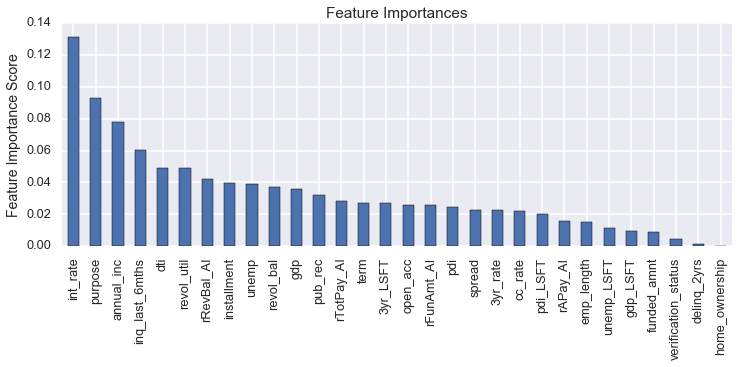

In [84]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

stdscale = StandardScaler()
datadf = encoder.fit_transform(full_data[names])
datadf[Fnames] = stdscale.fit_transform(datadf[Fnames])

gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, datadf, Fnames)

So, the mean CV score is ... and we should expect our model to do better than this.

Though, GBM is robust enough to not overfit with increasing trees, but a high number for pa particular learning rate can lead to overfitting. But as we reduce the learning rate and increase trees, the computation becomes expensive and would take a long time to run on standard personal computers.

Keeping all this in mind, we can take the following approach:

- Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
- Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.
- Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
- Lower the learning rate and increase the estimators proportionally to get more robust models.


Fix learning rate and number of estimators for tuning tree-based parameters

In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:
- min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
- min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
- max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.
- max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
- subsample = 0.8 : This is a commonly used used start value

Please note that all the above are just initial estimates and will be tuned later. Lets take the default learning rate of 0.1 here and check the optimum number of trees for that. For this purpose, we can do a grid search and test out values from 20 to 80 in steps of 10.

In [85]:
#predictors = Fnames
#target = label
#param_test1 = {'n_estimators':range(20,81,10)}
#gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
#param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(full_data[predictors],yencode.transform(full_data[target]))

In [86]:
#The output is :
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

As you can see that here we got "30" as the optimal estimators for 0.1 learning rate. Note that 60 would be a reasonable value and can be used as it is. But it might not be the same in all cases. Other situations:

- If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search
- If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate

In [87]:
#param_test1 = {'n_estimators':range(20,81,10)}
#gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
#param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(full_data[predictors],yencode.transform(full_data[target]))

In [88]:
#The output is :
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

## Voting Classifier 
1xLogistic, 4xRandom Forest, 1xgNB, 1xDecisionTree, 2xkNeighbors

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import linear_model, decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# we need to encode our target data as well. 

yencode = LabelEncoder().fit(dataset.target)

clf1 = LogisticRegression(random_state=12,class_weight={0:.7, 1:.3})
clf2 = RandomForestClassifier(max_features=5, min_samples_leaf=4, min_samples_split=9, 
                              bootstrap=False, criterion='entropy', max_depth=None, n_estimators=24, random_state=12) 
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(max_depth=4)
clf5 = KNeighborsClassifier(n_neighbors=7)
#clf6 = SVC(kernel='rbf', probability=True)

pca = decomposition.PCA(n_components=24)

# construct the pipeline 
pipe = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)),
        ('scalar', StandardScaler()),
        ('pca', pca),
        ('eclf_classifier', VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),
                                                         ('dtc', clf4),('knc', clf5)],
                        voting='soft',
                        weights=[2, 1, 1, 0, 1])),
    ])

# fit the pipeline 
pipe.fit(dataset.data, yencode.transform(dataset.target))

Pipeline(steps=[('encoder', EncodeCategorical(columns=[u'home_ownership', u'purpose', u'verification_status'])), ('imputer', ImputeCategorical(columns=['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_...eighbors=7, p=2,
           weights='uniform'))],
         voting='soft', weights=[2, 1, 1, 0, 1]))])

In [90]:
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import collections


print collections.Counter(dataset.target_test)
print collections.Counter(dataset.target)
print collections.Counter(full_data[label])
print collections.Counter(data_for_final_validation[label])


print "Test under TEST DATASET"
y_true, y_pred = yencode.transform(dataset.target_test), pipe.predict(dataset.data_test)
print(classification_report(y_true, y_pred))

print "Test under TRAIN DATASET"
y_true, y_pred = yencode.transform(dataset.target), pipe.predict(dataset.data)
print(classification_report(y_true, y_pred))

print "Test under FULL IMBALANCED DATASET without new fit call"
y_true, y_pred = yencode.transform(full_data[label]), pipe.predict(full_data[Fnames])
print(classification_report(y_true, y_pred))

print "Test under UNSEEN DATA without new fit call"
y_true, y_pred = yencode.transform(data_for_final_validation[label]), pipe.predict(data_for_final_validation[Fnames])
print(classification_report(y_true, y_pred))

Counter({'Paid': 14503, 'Default': 13612})
Counter({'Paid': 58118, 'Default': 54338})
Counter({'Paid': 73355, 'Default': 11440})
Counter({'Paid': 734, 'Default': 115})
Test under TEST DATASET
             precision    recall  f1-score   support

          0       0.72      0.98      0.83     13612
          1       0.97      0.64      0.77     14503

avg / total       0.85      0.80      0.80     28115

Test under TRAIN DATASET
             precision    recall  f1-score   support

          0       0.80      0.99      0.88     54338
          1       0.99      0.76      0.86     58118

avg / total       0.90      0.87      0.87    112456

Test under FULL IMBALANCED DATASET without new fit call
             precision    recall  f1-score   support

          0       0.37      0.98      0.54     11440
          1       1.00      0.74      0.85     73355

avg / total       0.91      0.77      0.81     84795

Test under UNSEEN DATA without new fit call
             precision    recall  f1-s

## Parameter Tuning for Logistic regression inside pipeline
A grid search or feature analysis may lead to a higher scoring model than the one we quickly put together.

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import linear_model, decomposition

yencode = LabelEncoder().fit(dataset.target)

logistic = LogisticRegression(penalty='l2', dual=False, solver='newton-cg')
clf2 = RandomForestClassifier(max_features=5, min_samples_leaf=4, min_samples_split=9, 
                              bootstrap=False, criterion='entropy', max_depth=None, n_estimators=24, random_state=12) 
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(max_depth=4)
clf5 = KNeighborsClassifier(n_neighbors=7)
#clf6 = SVC(kernel='rbf', probability=True)

pca = decomposition.PCA(n_components=24)

# construct the pipeline 
pipe = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)),
        ('scalar', StandardScaler()),
        ('pca', pca),
        ('logistic', logistic),
    ])


tuned_parameters = {
              #'pca__n_components':[5, 7, 13, 24],
              'logistic__fit_intercept':(False, True),
              #'logistic__C':(0.1, 1, 10),
              'logistic__class_weight':({0:.5, 1:.5},{0:.7, 1:.3},{0:.6, 1:.4},{0:.55, 1:.45},None),
             }

scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = GridSearchCV(pipe, tuned_parameters, scoring='%s_weighted' % score)
    clf.fit(dataset.data, yencode.transform(dataset.target))

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    
    print "Test under TEST DATASET"
    y_true, y_pred = yencode.transform(dataset.target_test), clf.predict(dataset.data_test)
    print(classification_report(y_true, y_pred))
    
    print "Test under TRAIN DATASET"
    y_true, y_pred = yencode.transform(dataset.target), clf.predict(dataset.data)
    print(classification_report(y_true, y_pred))
    
    print "Test under FULL IMBALANCED DATASET without new fit call"
    y_true, y_pred = yencode.transform(full_data[label]), clf.predict(full_data[Fnames])
    print(classification_report(y_true, y_pred))
    
    print "Test under UNSEEN DATA without new fit call"
    y_true, y_pred = yencode.transform(data_for_final_validation[label]), clf.predict(data_for_final_validation[Fnames])
    print classification_report(y_true, y_pred, target_names=dataset.target_names)
    


# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'logistic__class_weight': {0: 0.7, 1: 0.3}, 'logistic__fit_intercept': True}
()
Grid scores on development set:
()
0.622 (+/-0.002) for {'logistic__class_weight': {0: 0.5, 1: 0.5}, 'logistic__fit_intercept': False}
0.619 (+/-0.004) for {'logistic__class_weight': {0: 0.5, 1: 0.5}, 'logistic__fit_intercept': True}
0.622 (+/-0.003) for {'logistic__class_weight': {0: 0.7, 1: 0.3}, 'logistic__fit_intercept': False}
0.656 (+/-0.005) for {'logistic__class_weight': {0: 0.7, 1: 0.3}, 'logistic__fit_intercept': True}
0.621 (+/-0.002) for {'logistic__class_weight': {0: 0.6, 1: 0.4}, 'logistic__fit_intercept': False}
0.633 (+/-0.001) for {'logistic__class_weight': {0: 0.6, 1: 0.4}, 'logistic__fit_intercept': True}
0.622 (+/-0.003) for {'logistic__class_weight': {0: 0.55, 1: 0.45}, 'logistic__fit_intercept': False}
0.625 (+/-0.002) for {'logistic__class_weight': {0: 0.55, 1: 0.45}, 'logistic__fit_intercept'

## Parameter Tuning for classifiers inside VotingClassifier
A grid search or feature analysis may lead to a higher scoring model than the one we quickly put together.

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import linear_model, decomposition

yencode = LabelEncoder().fit(dataset.target)

logistic = LogisticRegression(penalty='l2', dual=False, solver='newton-cg')
clf2 = RandomForestClassifier(max_features=5, min_samples_leaf=4, min_samples_split=9, 
                              bootstrap=False, criterion='entropy', max_depth=None, n_estimators=24, random_state=12) 
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(max_depth=4)
clf5 = KNeighborsClassifier(n_neighbors=7)
#clf6 = SVC(kernel='rbf', probability=True)

pca = decomposition.PCA(n_components=24)

# construct the pipeline 
pipe = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)),
        ('scalar', StandardScaler()),
        ('pca', pca),
        ('eclf_classifier', VotingClassifier(estimators=[('logistic', logistic), ('randomf', clf2), ('nb', clf3),
                                                         ('decisiontree', clf4),('kn', clf5)],
                        voting='soft',
                        weights=[2, 1, 1, 0, 1])),
    ])


tuned_parameters = {
              #'pca__n_components':[5, 7, 13, 20, 24],
              #'eclf_classifier__logistic__fit_intercept':(False, True),
              #'logistic__C':(0.1, 1, 10),
              'eclf_classifier__logistic__class_weight':({0:.5, 1:.5},{0:.7, 1:.3},{0:.6, 1:.4},{0:.55, 1:.45},None),
              #'randomf__max_depth': [3, None],
              #'randomf__max_features': sp_randint(1, 11),
              #'randomf__min_samples_split': sp_randint(1, 11),
              #'randomf__min_samples_leaf': sp_randint(1, 11),
              #'randomf__bootstrap': [True, False],
              #'randomf__criterion': ['gini', 'entropy']

             }

scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = GridSearchCV(pipe, tuned_parameters, scoring='%s_weighted' % score)
    clf.fit(dataset.data, yencode.transform(dataset.target))

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    
    print "Test under TEST DATASET"
    y_true, y_pred = yencode.transform(dataset.target_test), clf.predict(dataset.data_test)
    print(classification_report(y_true, y_pred))

    print "Test under TRAIN DATASET"
    y_true, y_pred = yencode.transform(dataset.target), clf.predict(dataset.data)
    print(classification_report(y_true, y_pred))

    print "Test under FULL IMBALANCED DATASET without new fit call"
    y_true, y_pred = yencode.transform(full_data[label]), clf.predict(full_data[Fnames])
    print(classification_report(y_true, y_pred))
    
    print "Test under UNSEEN DATA without new fit call"
    y_true, y_pred = yencode.transform(data_for_final_validation[label]), clf.predict(data_for_final_validation[Fnames])
    print(classification_report(y_true, y_pred))
    


# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'eclf_classifier__logistic__class_weight': {0: 0.7, 1: 0.3}}
()
Grid scores on development set:
()
0.799 (+/-0.005) for {'eclf_classifier__logistic__class_weight': {0: 0.5, 1: 0.5}}
0.806 (+/-0.003) for {'eclf_classifier__logistic__class_weight': {0: 0.7, 1: 0.3}}
0.803 (+/-0.002) for {'eclf_classifier__logistic__class_weight': {0: 0.6, 1: 0.4}}
0.801 (+/-0.004) for {'eclf_classifier__logistic__class_weight': {0: 0.55, 1: 0.45}}
0.799 (+/-0.005) for {'eclf_classifier__logistic__class_weight': None}
()
Detailed classification report:
()
The model is trained on the full development set.
The scores are computed on the full evaluation set.
()
Test under TEST DATASET
             precision    recall  f1-score   support

          0       0.72      0.98      0.83     13612
          1       0.97      0.64      0.77     14503

avg / total       0.85      0.80      0.80     28115

Test under TRAIN DATA

## Tuning the weights in the VotingClassifier

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import numpy as np
import operator

class EnsembleClassifier(BaseEstimator, ClassifierMixin):
    """
    Ensemble classifier for scikit-learn estimators.

    Parameters
    ----------

    clf : `iterable`
      A list of scikit-learn classifier objects.
    weights : `list` (default: `None`)
      If `None`, the majority rule voting will be applied to the predicted class labels.
        If a list of weights (`float` or `int`) is provided, the averaged raw probabilities (via `predict_proba`)
        will be used to determine the most confident class label.

    """
    def __init__(self, clfs, weights=None):
        self.clfs = clfs
        self.weights = weights

    def fit(self, X, y):
        """
        Fit the scikit-learn estimators.

        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]
            Training data
        y : list or numpy array, shape = [n_samples]
            Class labels

        """
        for clf in self.clfs:
            clf.fit(X, y)

    def predict(self, X):
        """
        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]

        Returns
        ----------

        maj : list or numpy array, shape = [n_samples]
            Predicted class labels by majority rule

        """

        self.classes_ = np.asarray([clf.predict(X) for clf in self.clfs])
        if self.weights:
            avg = self.predict_proba(X)

            maj = np.apply_along_axis(lambda x: max(enumerate(x), key=operator.itemgetter(1))[0], axis=1, arr=avg)

        else:
            maj = np.asarray([np.argmax(np.bincount(self.classes_[:,c])) for c in range(self.classes_.shape[1])])

        return maj

    def predict_proba(self, X):

        """
        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]

        Returns
        ----------

        avg : list or numpy array, shape = [n_samples, n_probabilities]
            Weighted average probability for each class per sample.

        """
        self.probas_ = [clf.predict_proba(X) for clf in self.clfs]
        avg = np.average(self.probas_, axis=0, weights=self.weights)

        return avg

In [ ]:
y_true = yencode.transform(full_data[label])

df = pd.DataFrame(columns=('w1', 'w2', 'w3','w4','w5', 'mean', 'std'))

i = 0
for w1 in range(0,2):
    for w2 in range(0,2):
        for w3 in range(0,2):
            for w4 in range(0,2):
                for w5 in range(0,2):
                    if len(set((w1,w2,w3,w4,w5))) == 1: # skip if all weights are equal
                        continue

                    eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3, clf4, clf5], weights=[w1,w2,w3,w4,w5])
                    eclf.fit(dataset.data, yencode.transform(dataset.target))
                    print "w1"
                    print w1
                    print "w2"
                    print w2
                    print "w3"
                    print w3
                    print "w4"
                    print w4
                    print "w5"
                    print w5
                    print "Test under TEST DATASET"
                    y_true, y_pred = yencode.transform(dataset.target_test), eclf.predict(dataset.data_test)
                    print(classification_report(y_true, y_pred))

                    print "Test under TRAIN DATASET"
                    y_true, y_pred = yencode.transform(dataset.target), eclf.predict(dataset.data)
                    print(classification_report(y_true, y_pred))

                    print "Test under FULL IMBALANCED DATASET without new fit call"
                    y_true, y_pred = yencode.transform(full_data[label]), eclf.predict(full_data[Fnames])
                    print(classification_report(y_true, y_pred))
                    
                    print "Test under UNSEEN DATA without new fit call"
                    y_true, y_pred = yencode.transform(data_for_final_validation[label]), eclf.predict(data_for_final_validation[Fnames])
                    print classification_report(y_true, y_pred, target_names=dataset.target_names)
                    
                    #scores = cross_validation.cross_val_score(
                    #                                estimator=eclf,
                    #                                X=full_data[Fnames],
                    #                                y=y_true,
                    #                                cv=5,
                    #                                scoring='f1',
                    #                                n_jobs=1)

                    #df.loc[i] = [w1, w2, w3, w4, w5, scores.mean(), scores.std()]
                    i += 1
                    #print i
                    #print scores.mean()
#df.sort(columns=['mean', 'std'], ascending=False)

The pipeline first passes data through our encoder, then to the imputer, and finally to our classifier. In this case, I have chosen a `LogisticRegression`, a regularized linear model that is used to estimate a categorical dependent variable, much like the binary target we have in this case. We can then evaluate the model on the test data set using the same exact pipeline. 

The last step is to save our model to disk for reuse later, with the `pickle` module:

# Model Pickle

In [ ]:
import pickle 

def dump_model(model, path='data', name='lrclassifier.pickle'):
    with open(os.path.join(path, name), 'wb') as f:
        pickle.dump(model, f)
        
dump_model(lr)

In [ ]:
import pickle 

def dump_model(model, path='data', name='rfclassifier.pickle'):
    with open(os.path.join(path, name), 'wb') as f:
        pickle.dump(model, f)
        
dump_model(rf)

In [ ]:
import pickle 

def dump_model(model, path='data', name='encodert.pickle'):
    with open(os.path.join(path, name), 'wb') as f:
        pickle.dump(model, f)
        
dump_model(yencode)

# SVMs

Support Vector Machines (SVM) uses points in transformed problem space that separates the classes into groups.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.svm import SVC

# we need to encode our target data as well. 

yencode = LabelEncoder().fit(dataset.target)


# construct the pipeline 
svm = Pipeline([
        ('encoder',  EncodeCategorical(dataset.categorical_features.keys())),
        ('imputer', ImputeCategorical(Fnames)),
        ('scalar', StandardScaler()),
        ('classifier', SVC(kernel='linear'))
    ])

svm.fit(dataset.data, yencode.transform(dataset.target))

print "Test under TEST DATASET"
y_true, y_pred = yencode.transform(dataset.target_test), svm.predict(dataset.data_test)
print(classification_report(y_true, y_pred))
print "Test under TRAIN DATASET"
y_true, y_pred = yencode.transform(dataset.target), svm.predict(dataset.data)
print(classification_report(y_true, y_pred))
print "Test under FULL IMBALANCED DATASET without new fit call"
y_true, y_pred = yencode.transform(full_data[label]), svm.predict(full_data[Fnames])
print(classification_report(y_true, y_pred))
print "Test under UNSEEN DATA without new fit call"
y_true, y_pred = yencode.transform(data_for_final_validation[label]), svm.predict(data_for_final_validation[Fnames])
print classification_report(y_true, y_pred, target_names=dataset.target_names)

#kernels = ['linear', 'poly', 'rbf']


#for kernel in kernels:
#    if kernel != 'poly':
#        model      = SVC(kernel=kernel)
#    else:
#        model      = SVC(kernel=kernel, degree=3)


We can also dump meta information about the date and time your model was built, who built the model, etc. But we'll skip that step here. 

## Model Operation 

Now it's time to explore how to use the model. To do this, we'll create a simple function that gathers input from the user on the command line, and returns a prediction with the classifier model. Moreover, this function will load the pickled model into memory to ensure the latest and greatest saved model is what's being used. 

In [ ]:
def load_model(path='data/rfclassifier.pickle'):
    with open(path, 'rb') as f:
        return pickle.load(f) 


def predict(model, meta=meta):
    
    data = {} # Store the input from the user

    data['funded_amnt'] = 4000
    data['installment'] = 311
    data['term'] = 36
    data['verification_status'] = "Verified"
    data['int_rate'] = 3.9
    data['emp_length'] = 1
    data['home_ownership'] = "RENT"
    data['annual_inc'] = 200000
    data['purpose'] = "debt_consolidation"
    data['dti'] = 0.5311285413202668
    #data['dti'] = dti_sel_usr
    data['delinq_2yrs'] = 1
    data['inq_last_6mths'] = 2
    data['pub_rec'] = 0
    data['revol_util'] = 30.6
    data['open_acc'] = 19
    data['revol_bal'] = 8254

#Need to fetch data from the database or dictionary
    data['rFunAmt_AI'] = 0.18633540372670807
    data['rTotPay_AI'] = 0.2961427066013342
    data['rRevBal_AI'] = 0.12816770186335405
    data['rAPay_AI'] = 0.05922854132026684
    # Macroeconomical data
    data['pdi'] = 42861.355
    data['pdi_LSFT'] = 81.6725
    data['gdp'] = 56989.903
    data['gdp_LSFT'] = 61.28599681
    data['3yr_rate'] = 0.0039
    data['3yr_LSFT'] = -0.00004
    data['cc_rate'] = 0.119133333
    data['unemp'] = 0.083
    data['unemp_LSFT'] = -0.001456044
    data['spread'] = 1.808
    
    inputdf = pd.DataFrame([data])
#    print data_for_final_validation[Fnames].head(3)
#    print inputdf
    # Create prediction and label 
#    yhat = model.predict(pd.DataFrame([data]))
#    yhat = model.predict_proba(data_for_final_validation[Fnames].head(3))
    yhat = model.predict_proba(inputdf[Fnames])
    print yhat
    print yencode.inverse_transform(0)
#    return yencode.inverse_transform(yhat)
            
    
# Execute the interface 
model = load_model()
predict(model)

In [ ]:
#print data
#yhat = model.predict_proba(pd.DataFrame([data]))